In [1]:
import numpy as np
import os
import nmrglue as ng
import matplotlib.pyplot as plt

This Notebook should be used with the 3D over-rotation experiment, "overrotcal_xy".
By default, the phase ofset starts at 0 and decrements by 2 with td1. If this convention
is changed, this analysis notebook should similarly be updated.

In [2]:
path = 'C:\\Users\\awsta\\Dropbox\\NMR_Data'

In [3]:
file = path+"\\124"
print(file)

C:\Users\awsta\Dropbox\NMR_Data\124


In [4]:
dic, arr = ng.fileio.bruker.read(file)

C:\Users\awsta\Documents\workspace\qeg-env\lib\site-packages\nmrglue\fileio\bruker.py:394: UserWarning: Error reading the pulse program
  warn('Error reading the pulse program')


In [5]:
td1,td2,td3 = arr.shape

In [6]:
signal = np.real(arr[:,:,0])

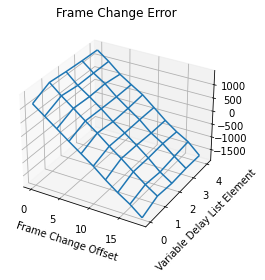

In [15]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y = np.meshgrid(range(0,2*signal.shape[0],2), range(signal.shape[1]))
c = ax.plot_wireframe(x, y, signal.transpose())
ax.set_title('Frame Change Error')
# set the limits of the plot to the limits of the data
ax.set_xlabel('Frame Change Offset')
ax.set_ylabel('Variable Delay List Element')
plt.show()

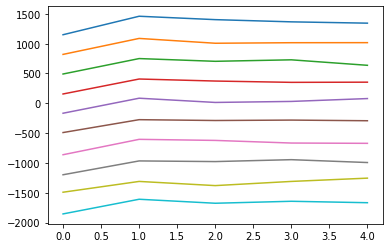

In [7]:
plt.plot(signal.transpose())
plt.show()

In [8]:
norms = [sum(abs(signal[k,:])) for k in range(td1)]

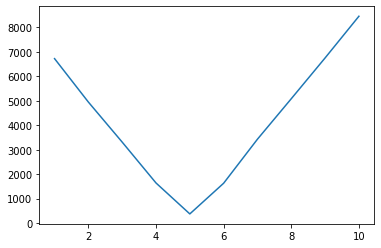

In [9]:
plt.plot(list(range(1,td1+1)), norms)

In [10]:
overrot_angle = 2*(np.argmin(norms)+1)
print("Over-rotation angle is given by " + str(overrot_angle) + " deg.")

Over-rotation angle is given by 10 deg.
